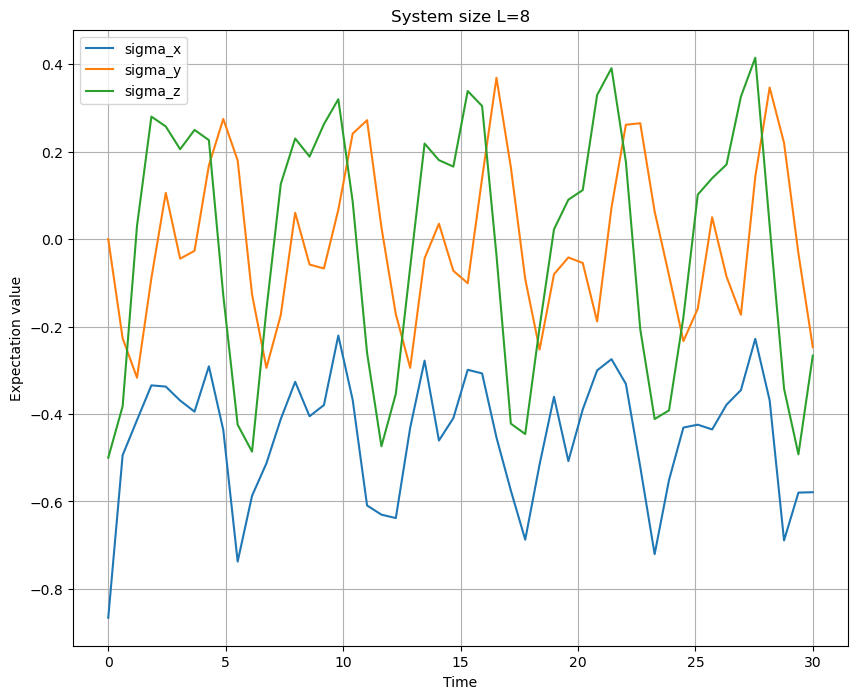

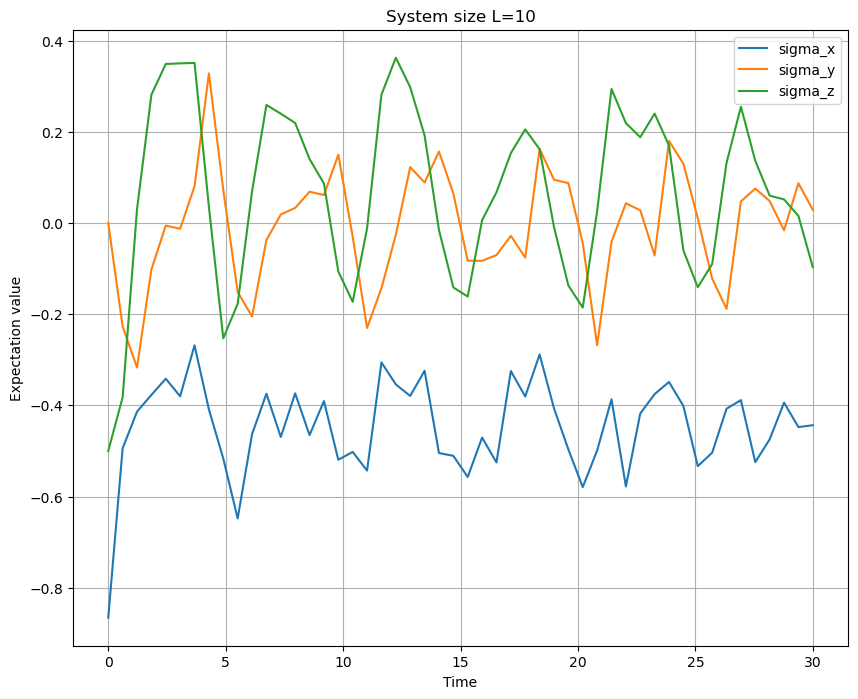

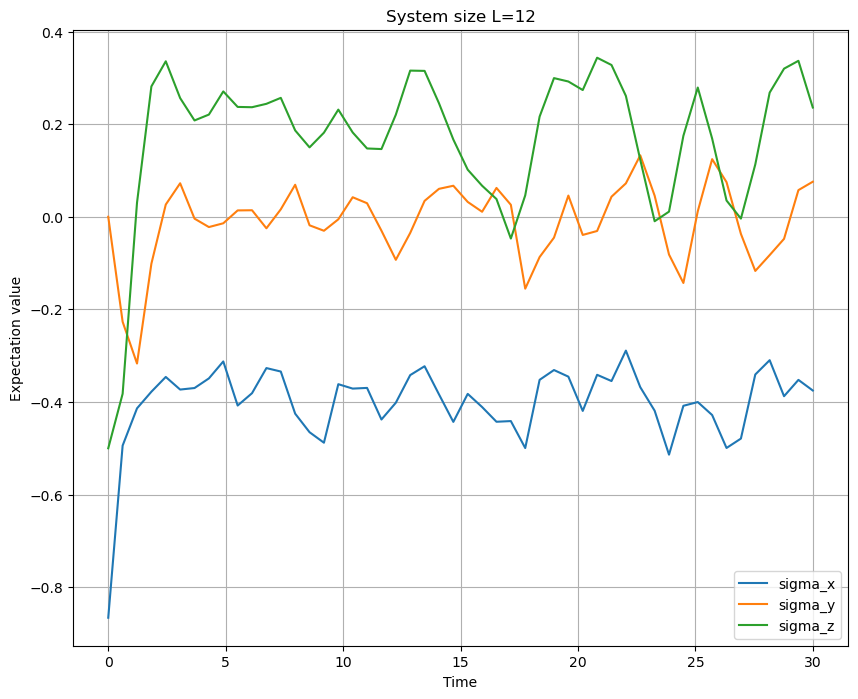

In [5]:
# System size and parameters
import numpy as np
import matplotlib.pyplot as plt
from hw3.src.p4_1.fns import compute_observable_expectation, periodic_dense_hamiltonian
from hw1.src.hw1 import tensor_product

L_values = [8, 10, 12]
h_x = -1.05
h_z = 0.5
t_values = np.linspace(0, 30, 50)

# Define the observables for the first site
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
identity = np.identity(2)

observables_labels = ['sigma_x', 'sigma_y', 'sigma_z']

def extend_observables(L):
    """Extend observables to the full system size."""
    full_observables = {
        'sigma_x': tensor_product([sigma_x] + [identity] * (L - 1)),
        'sigma_y': tensor_product([sigma_y] + [identity] * (L - 1)),
        'sigma_z': tensor_product([sigma_z] + [identity] * (L - 1))
    }
    return full_observables

def make_initial_state(single_site, L):
    """Generate the initial state as a tensor product across all sites."""
    state = single_site
    for _ in range(1, L):
        state = np.kron(state, single_site)
    return state / np.linalg.norm(state)  # Ensure normalization

# Loop over different system sizes
for L in L_values:
    # Extend observables to the full system size
    full_observables = extend_observables(L)

    # Corrected: tensor product of single_site across all sites
    single_site = np.array([1, -np.sqrt(3)]) / 2
    initial_state = make_initial_state(single_site, L)

    # Prepare to plot
    plt.figure(figsize=(10, 8))
    plt.title(f"System size L={L}")
    plt.xlabel("Time")
    plt.ylabel("Expectation value")

    # Generate the Hamiltonian
    H = periodic_dense_hamiltonian(L, h_x, h_z)

    # Diagonalize the Hamiltonian
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    # Calculate the overlap coefficients
    overlap_coefficients = np.dot(eigenvectors.conj().T, initial_state)

    for label, observable in full_observables.items():
        expectations = []
        for t in t_values:
            expectation = compute_observable_expectation(t, observable, overlap_coefficients, eigenvalues, eigenvectors)
            expectations.append(np.real(expectation))  # Using real part; adjust if needed

        plt.plot(t_values, expectations, label=label)

    plt.legend()
    plt.grid(True)
    plt.show()


I was able to run system sizes of L=8,10,12 in a reasonable time span, so only data for these system sizes is shown. As can be seen, the larger system sizes have a dampening effect in the oscillations of expectation value of the observable as time goes on. So in the timid of a large system size, I would expect the observable expectation values to approach their thermal value.

Now measure the same observables $\left\langle\sigma_{1}^{\mu}\right\rangle_{\beta}, \mu=x, y, z$, in the equilibrium state using (6) and compare these to your time-dependent values by marking these values as horizontal lines on your time trace of $\left\langle\sigma_{1}^{\mu}(t)\right\rangle$. Comment on the approach to equilibrium and the dependence on system size. You will notice that one of the $\left\langle\sigma_{1}^{\mu}\right\rangle_{\beta}$ disappears identically. Which one is this, and why?

KeyboardInterrupt: 

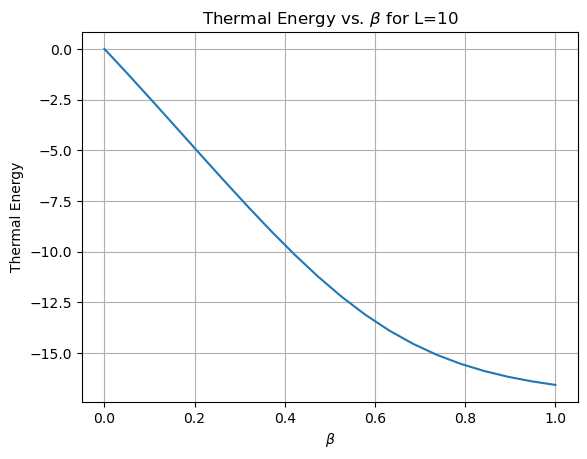

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hw1.src.hw1 import tensor_product
from hw3.src.p4_1.fns import periodic_dense_hamiltonian, compute_observable_expectation
from p4_1_2 import compute_thermal_energy, compute_thermal_observable, make_product_state
# Set system parameters
L_values = [10, 12, 14]
h_x = -1.05
h_z = 0.5
beta_values = np.linspace(0, 1, 20)

# Define simple matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
identity = np.identity(2)
observables_labels = [rf"$\sigma_{label}$" for label in ['x', 'y', 'z']]
observables_colors = ['blue', 'green', 'orange']

for l in L_values:
    # Generate the Hamiltonian
    H = periodic_dense_hamiltonian(l, h_x, h_z)
    # Diagonalize the Hamiltonian
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    # Compute thermal energies
    thermal_energies = {}
    for beta in beta_values:
        thermal_energies[beta] = compute_thermal_energy(beta, eigenvalues)

    plt.figure()
    plt.title(f"Thermal Energy vs. $\\beta$ for L={l}")
    plt.xlabel(r"$\beta$")
    plt.ylabel("Thermal Energy")
    plt.plot(list(thermal_energies.keys()), list(thermal_energies.values()), label="Thermal Energy")
    plt.grid()

    # Generate the initial state
    single_sight = np.array([1, -np.sqrt(3)]) / 2
    initial_state = make_product_state(single_sight, l)
    
    # Calculate the overlap coefficients
    overlap_coefficients = np.dot(eigenvectors.conj().T, initial_state)

    # Compute the initial energy of the initial state
    initial_energy = compute_observable_expectation(0, H, overlap_coefficients, eigenvalues, eigenvectors)    

    # Plot the horizontal dashed red line at the initial energy
    plt.axhline(y=initial_energy, color='r', linestyle='--', label="Initial Energy")

    def find_intersection_point(thermal_energies, initial_energy):
        beta_intersection = None  # Initialize beta_intersection
        for beta, energy in thermal_energies.items():
            if abs(energy - initial_energy) < 1e0:
                plt.annotate(rf"$\beta = {beta:.2f}$", (beta, energy), textcoords="offset points", xytext=(0, 10), ha='center', color='red')
                beta_intersection = beta
                break
        return beta_intersection
    
    beta_intersection = find_intersection_point(thermal_energies, initial_energy)

    # Add legend and save the plot
    plt.legend()
    plt.show()

    # Extend observables to the full system size
    full_sigma_x = tensor_product([sigma_x] + [identity] * (l - 1))
    full_sigma_y = tensor_product([sigma_y] + [identity] * (l - 1))
    full_sigma_z = tensor_product([sigma_z] + [identity] * (l - 1))
    full_observables = [full_sigma_x, full_sigma_y, full_sigma_z]

     # Identify the value of each observable at the beta intersection if it exists
    if beta_intersection is not None:
        observables_values = {}
        for observable, label in zip(full_observables, observables_labels):
            observables_values[label] = compute_thermal_observable(beta_intersection, eigenvalues, eigenvectors, observable)
        print(f"Observables at beta intersection ({beta_intersection}): {observables_values}")
    else:
        print(f"No intersection found for L={l}")

    # Plot the time-dependent values of each observable
    observables_values_time = {}
    t_values = np.linspace(0, 50, 20)
    for label, observable in zip(observables_labels, full_observables):
        expectations = []
        for t in t_values:
           expectation = compute_observable_expectation(t, observable, overlap_coefficients, eigenvalues, eigenvectors)
        expectations.append(expectation.real if np.isclose(expectation.imag, 0) else np.nan)
        observables_values_time[label] = expectations

    plt.figure()
    plt.title(f"Time-dependent Value of Observable with Equilibrium Value Annotated for L={l}")
    plt.xlabel("Time")
    plt.ylabel("Expectation Value")
    for label, color in zip(observables_labels, observables_colors):
        plt.plot(t_values, observables_values_time[label], label=label)
    for label, value, color in zip(observables_labels, observables_values.values(), observables_colors):
        plt.axhline(y=value, color=color, linestyle='--', label=rf"{label} at $\beta_{{eq}} = {beta_intersection:.2f}$")
    plt.legend()
    plt.grid()
    plt.savefig(f"p4_1_2_time_L{l}.png")

In [ ]:
def find_intersection_point(thermal_energies, initial_energy):
    beta_intersection = None  # Initialize beta_intersection
    for beta, energy in thermal_energies.items():
        if abs(energy - initial_energy) < 1e-1:
            plt.annotate(rf"$\beta = {beta:.2f}$", (beta, energy), textcoords="offset points", xytext=(0, 10), ha='center', color='red')
            beta_intersection = beta
            break
    return beta_intersection

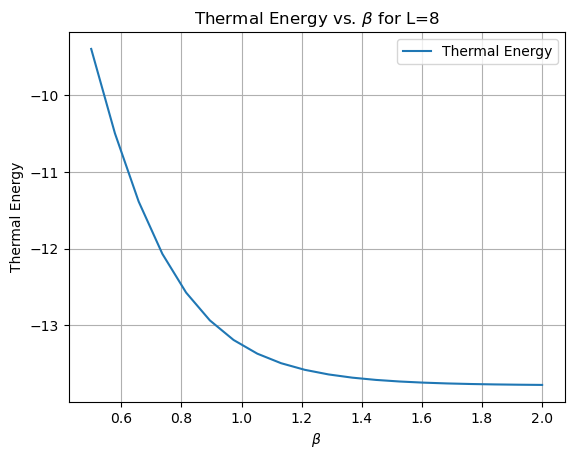

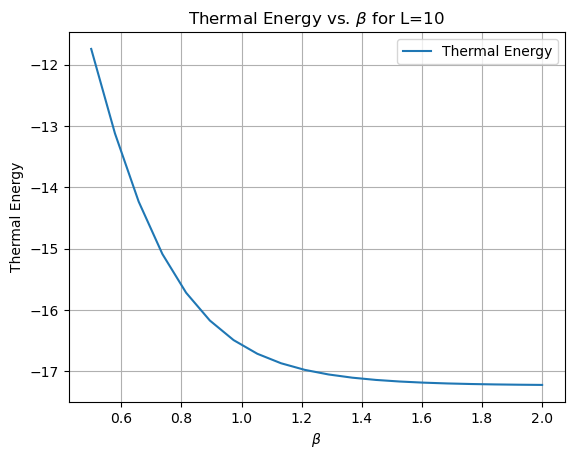

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hw1.src.hw1 import tensor_product
from hw3.src.p4_1.fns import periodic_dense_hamiltonian, compute_observable_expectation
from p4_1_2 import compute_thermal_energy, compute_thermal_observable, make_product_state
# Set system parameters
L_values = [8, 10]
h_x = -1.05
h_z = 0.5
beta_values = np.linspace(0.5, 2, 20)

# Define simple matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
identity = np.identity(2)
observables_labels = [rf"$\sigma_{label}$" for label in ['x', 'y', 'z']]
observables_colors = ['blue', 'green', 'orange']

for l in L_values:
    # Generate the Hamiltonian
    H = periodic_dense_hamiltonian(l, h_x, h_z)
    # Diagonalize the Hamiltonian
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    # Compute thermal energies
    thermal_energies = {}
    for beta in beta_values:
        thermal_energies[beta] = compute_thermal_energy(beta, eigenvalues)

    plt.figure()
    plt.title(f"Thermal Energy vs. $\\beta$ for L={l}")
    plt.xlabel(r"$\beta$")
    plt.ylabel("Thermal Energy")
    plt.plot(list(thermal_energies.keys()), list(thermal_energies.values()), label="Thermal Energy")
    plt.grid()
    plt.legend()
    plt.show()

    # Generate the initial state
    single_sight = np.array([1, -np.sqrt(3)]) / 2
    initial_state = make_product_state(single_sight, l)
    
    # Calculate the overlap coefficients
    overlap_coefficients = np.dot(eigenvectors.conj().T, initial_state)

    # Compute the initial energy of the initial state
    

    # # Plot the horizontal dashed red line at the initial energy
    # plt.axhline(y=initial_energy, color='r', linestyle='--', label="Initial Energy")

    # # Find and annotate the intersection point
    # intersection_found = False
    # for beta, energy in thermal_energies.items():
    #     if abs(energy - initial_energy) < 1e-1:
    #         plt.annotate(rf"$\beta = {beta:.2f}$", (beta, energy), textcoords="offset points", xytext=(0, 10), ha='center', color='red')
    #         intersection_found = True
    #         beta_intersection = beta
    #         break

    # # Add legend and save the plot
    # plt.legend()
    # plt.savefig(f"p4_1_2_L{l}.png")

    # # Extend observables to the full system size
    # full_sigma_x = tensor_product([sigma_x] + [identity] * (l - 1))
    # full_sigma_y = tensor_product([sigma_y] + [identity] * (l - 1))
    # full_sigma_z = tensor_product([sigma_z] + [identity] * (l - 1))
    # full_observables = [full_sigma_x, full_sigma_y, full_sigma_z]

    # # Identify the value of each observable at the beta intersection
    # observables_values = {}
    # for observable, label in zip(full_observables, observables_labels):
    #     observables_values[label] = compute_thermal_observable(beta_intersection, eigenvalues, eigenvectors, observable)

    # # Plot the time-dependent values of each observable
    # observables_values_time = {}
    # t_values = np.linspace(0, 50, 100)
    # for label, observable in zip(observables_labels, full_observables):
    #     expectations = []
    #     for t in t_values:
    #         expectation = compute_observable_expectation_vectorized(t, observable, overlap_coefficients, eigenvalues, eigenvectors)
    #         expectations.append(expectation.real if np.isclose(expectation.imag, 0) else np.nan)
    #     observables_values_time[label] = expectations

    # plt.figure()
    # plt.title(f"Time-dependent Value of Observable with Equilibrium Value Annotated for L={l}")
    # plt.xlabel("Time")
    # plt.ylabel("Expectation Value")
    # for label, color in zip(observables_labels, observables_colors):
    #     plt.plot(t_values, observables_values_time[label], label=label)
    # for label, value, color in zip(observables_labels, observables_values.values(), observables_colors):
    #     plt.axhline(y=value, color=color, linestyle='--', label=rf"{label} at $\beta_{{eq}} = {beta_intersection:.2f}$")
    # plt.legend()
    # plt.grid()
    # plt.savefig(f"p4_1_2_time_L{l}.png")

Again, as time goes on, there is an approach to the equilibrium value for the observables, which is the same phenomenon as the damping that I mentioned earlier. I notice that the $\left\langle\sigma_{1}^{y}\right\rangle_{\beta}$ observable disappears identically. This can be justified as follows:
\begin{equation}
\bra{\Psi } \sigma_{1}^{y} \ket{\Psi} = i \bra{\Psi } 
\begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}
\ket{\Psi} = i \mathbb{R}
\end{equation}
so this observable has a purely imaginary expectation value, and so it shows of as a horizontal line with a value of 0 in the plot.

The initial state $|\psi(0)\rangle$ has highly excited energy, lying near the middle of the spectrum. However, because it's a product state and therefore very atypical, one may wonder whether under unitary time evolution the property of low entanglement might be preserved in any way. Compute the time-dependent state $|\psi(t)\rangle$ using (2) and measure the half-system entanglement entropy $S_{L / 2}(t)$. Plot the time trace of this quantity, and comment on the behavior at both early and late times. To ensure that we've not accidentally chosen a special excited state, repeat this experiment for some other product state. What are the implications of your measurements with regard to our ability to simulate the time evolution of quantum states using MPS?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from p4_1_2 import make_product_state
from hw2.src.p5_2 import entanglement_entropy, calculate_reduced_density_matrix
from hw1.src.hw1 import tensor_product, periodic_dense_hamiltonian_explicit

# Set system parameters
L_values = [8, 10, 12]
h_x = -1.05
h_z = 0.5
t_values = np.linspace(0, 50, 20)

# Define the function to compute the time-dependent state
def time_dependent_state(t, overlap_coefficients, eigenvalues, eigenvectors):
    """Computes the time-dependent state |ψ(t)>."""
    return np.sum(np.exp(-1j * eigenvalues * t) * overlap_coefficients * eigenvectors, axis=1)

# Plot entanglement entropy for each state
def plot_entanglement_entropy(L_values, t_values, h_x, h_z, single_sites):
    """Plots the entanglement entropy for given system sizes and initial states."""
    for L in L_values:
        # Generate product states for each single-site state
        product_states = [make_product_state(single_site, L) for single_site in single_sites]
        
        # Generate the Hamiltonian
        H = periodic_dense_hamiltonian_explicit(L, h_x, h_z)
        
        # Diagonalize the Hamiltonian
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        
        # Compute the overlap coefficients for each product state
        overlap_coefficients_list = [np.dot(eigenvectors.conj().T, product_state) for product_state in product_states]
        
        # Compute and plot the entanglement entropy for each product state
        for i, overlap_coefficients in enumerate(overlap_coefficients_list):
            entropy_values = []
            for t in t_values:
                # Compute the time-dependent state |ψ(t)>
                psi_t = time_dependent_state(t, overlap_coefficients, eigenvalues, eigenvectors)
                
                # Calculate the reduced density matrix
                reduced_density_matrix = calculate_reduced_density_matrix(psi_t, L, L // 2)
                
                # Calculate the entanglement entropy
                entropy = entanglement_entropy(reduced_density_matrix)
                entropy_values.append(entropy)
            
            # Plot the entanglement entropy as a function of time
            plt.figure()
            plt.title(f"Entanglement Entropy vs. Time for L={L}, State {i+1}")
            plt.xlabel("Time")
            plt.ylabel("Entanglement Entropy")
            plt.plot(t_values, entropy_values, label=f"State {i+1}")
            plt.legend()
            plt.grid()
            plt.savefig(f"Entanglement_Entropy_L{L}_State{i+1}.png")
            plt.show()

# Define the single-site states
single_sites = [
    np.array([1, -np.sqrt(3)]) / 2,
    np.array([-2, 1]) / np.sqrt(5)
]

# Generate and plot the entanglement entropy
plot_entanglement_entropy(L_values, t_values, h_x, h_z, single_sites)


Since the MPS is an approximation of entangled quantum states into more like a product state (we can think about the MPS as a single list with a tensor on each site of the spin system, similar to a product state), I would expect that MPS quantum states can simulate time evolution fairly well, just like we observed with the product states in this exercise.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from p4_1_2 import make_product_state
from p4_2 import translation_operator, identify_k0_sector
from hw2.src.p5_2 import entanglement_entropy, calculate_reduced_density_matrix.src.hw1 import tensor_product, periodic_dense_hamiltonian_explicit
from hw3.src.p4_1.fns import compute_observable_expectation_vectorized

# Set system parameters
L_values = [4, 6, 8]

h_z = 0.5
t_values = np.linspace(0, 50, 100)
for L in L_values:
    # Generate the Hamiltonian
    H = periodic_dense_hamiltonian_explicit(L, h_x, h_z)
    
    # Diagonalize the Hamiltonian
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    # Generate the initial state
    single_site = np.array([1, -np.sqrt(3)]) / 2
    initial_state = make_product_state(single_site, L)
    
    # define the translation operator for the system
    translation_op = translation_operator(L)

    # Identify the k=0 sector
    k0_sector = identify_k0_sector(eigenvectors, translation_op)

    # define the set of observables that we will want to compute
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_y = np.array([[0, -1j], [1j, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    identity = np.identity(2)
    full_sigma_x = tensor_product([sigma_x] + [identity] * (L - 1))
    full_sigma_y = tensor_product([sigma_y] + [identity] * (L - 1))
    full_sigma_z = tensor_product([sigma_z] + [identity] * (L - 1))
    full_observables = [full_sigma_x, full_sigma_y, full_sigma_z]
    for observable in full_observables:
        # loop over the entices in the k0 sector
        expectation_values = []
        for k0_index in k0_sector:
            for t in t_values:
                # compute the observable at this given index
                observable_k0 = compute_observable_expectation_vectorized(t, observable, eigenvectors[:, k0_index], eigenvalues, eigenvectors)

